In [6]:
####################################################
####################################################
############# Test the Engine Class ################
####################################################
from DAG import draw_dot
from Engine import Value

### Exemple : 
- f * ( a * b + c )

Value(data=-8.0, grad=0.0)


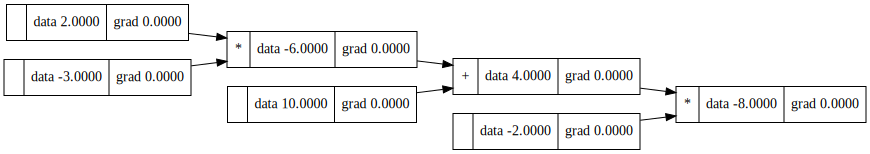

In [7]:
a=Value(2.0)
b=Value(-3.0)
c=Value(10.0)
d=a*b+c
f=Value(-2.0)
L=f*d
print(L)
# show graph
draw_dot(L)

### Bug is fixed (when one node is used multiple times) : 

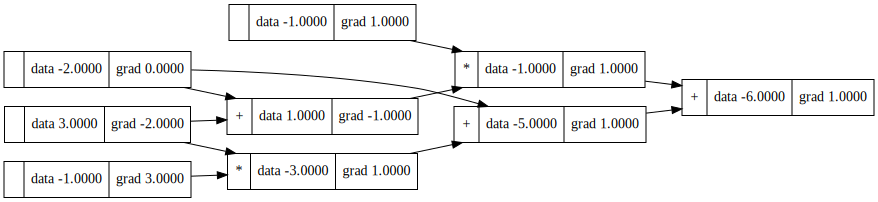

In [8]:
a = Value(-2.0)
b = Value(3.0)
d = a - b  
e = a + b  
f = d - e
f.backward()
draw_dot(f)

## Exemple one neural with backward : 
- tanh ( (x1 * w1) + (x2 * w2) +b )

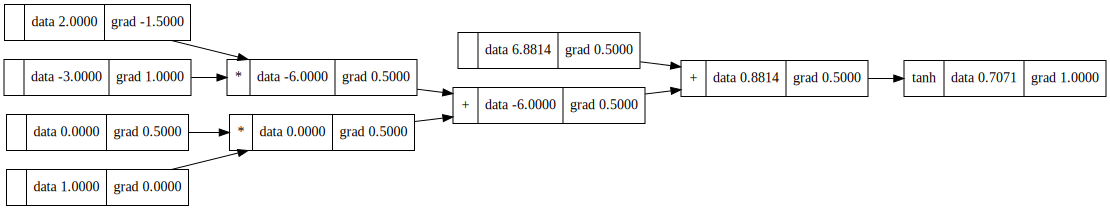

In [9]:
# inputs x1,x2
x1 = Value(2.0 )
x2 = Value(0.0 )
# weights w1,w2
w1 = Value(-3.0)
w2 = Value(1.0)
# bias of the neuron
b = Value(6.8813735870195432)
# x1*w1 + x2*w2 + b
x1w1 = x1*w1
x2w2 = x2*w2
x1w1x2w2 = x1w1 + x2w2
n = x1w1x2w2 + b
# tanh(n)
o = n.tanh()
# backward
o.backward()
# show graph
draw_dot(o)

##### Test same problem using torch

In [10]:

import torch
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737
